### 📚 필수 라이브러리

In [17]:
import math
import statsmodels.api as sm
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

### 📚 데이터 이해 및 준비

In [18]:
cvd_df = pd.read_csv('cardio_train.csv', sep=';').drop(columns='id')
cvd_df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [19]:
cvd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.4 MB


In [20]:
# 데이터를 보니까, 가장 먼저 나이를 년수로 바꿔줘야겠군요!
# 그리고 ap_hi의 값과 ap_lo의 값은 수축기 혈압과 이완기 혈압을 나타내는데 혈압이 음수인건 말이 안되니, 해당 행은 삭제해줄게요.
cvd_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,70000.0,19468.865814,2467.251667,10798.0,17664.0,19703.0,21327.0,23713.0
gender,70000.0,1.349571,0.476838,1.0,1.0,1.0,2.0,2.0
height,70000.0,164.359229,8.210126,55.0,159.0,165.0,170.0,250.0
weight,70000.0,74.205690,14.395757,10.0,65.0,72.0,82.0,200.0
ap_hi,70000.0,128.817286,154.011419,-150.0,120.0,120.0,140.0,16020.0
ap_lo,70000.0,96.630414,188.472530,-70.0,80.0,80.0,90.0,11000.0
cholesterol,70000.0,1.366871,0.680250,1.0,1.0,1.0,2.0,3.0
gluc,70000.0,1.226457,0.572270,1.0,1.0,1.0,1.0,3.0
smoke,70000.0,0.088129,0.283484,0.0,0.0,0.0,0.0,1.0
alco,70000.0,0.053771,0.225568,0.0,0.0,0.0,0.0,1.0


In [21]:
# 모든 나이를 연수로 변환
cvd_df['age'] = cvd_df['age']/365.24
# 혈압이 370보다 작은 경우와 0보다 큰 경우만 취급
cvd_df = cvd_df[(cvd_df['ap_hi']<=370)&(cvd_df['ap_hi']>0)]
cvd_df = cvd_df[(cvd_df['ap_lo']<=370)&(cvd_df['ap_lo']>0)]
# 수축기 혈압이 이완기 혈압보다 크거나 같아야한다.
cvd_df = cvd_df[(cvd_df['ap_hi']>=cvd_df['ap_lo'])]
cvd_df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.358668,2,168,62.0,110,80,1,1,0,0,1,0
1,55.382762,1,156,85.0,140,90,3,1,0,0,1,1
2,51.629066,1,165,64.0,130,70,3,1,0,0,0,1
3,48.250465,2,169,82.0,150,100,1,1,0,0,1,1
4,47.842515,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,52.677691,2,168,76.0,120,80,1,1,1,0,1,0
69996,61.879860,1,158,126.0,140,90,2,2,0,0,1,1
69997,52.201292,2,183,105.0,180,90,3,1,0,1,0,1
69998,61.414412,1,163,72.0,135,80,1,2,0,0,0,1


In [22]:
# 입력데이터와 타깃데이터를 나눌게요.
x = cvd_df.drop(columns='cardio')
y = cvd_df['cardio']

In [24]:
# 훈련데이터와 테스트데이터를 나눠줄게요.
train_input, test_input, train_target, test_target = train_test_split(x,
                                                                      y,
                                                                      test_size=0.15,
                                                                      random_state=42)

### 📚 해석 방법론의 종류와 범위

In [27]:
# 로지스틱 모델을 사용해서 훈련시켜보죠.
# 여기서 add_constant는 절편 1을 추가합니다. 왜냐하면 절편을 추가하지 않으면 원점을 지나기 때문이죠.
log_model = sm.Logit(train_target, sm.add_constant(train_input))
log_result = log_model.fit()
print(log_result.summary2())

Optimization terminated successfully.
         Current function value: 0.560462
         Iterations 6
                         Results: Logit
Model:              Logit            Method:           MLE       
Dependent Variable: cardio           Pseudo R-squared: 0.191     
Date:               2025-02-18 13:08 AIC:              65490.4492
No. Observations:   58404            BIC:              65598.1509
Df Model:           11               Log-Likelihood:   -32733.   
Df Residuals:       58392            LL-Null:          -40479.   
Converged:          1.0000           LLR p-value:      0.0000    
No. Iterations:     6.0000           Scale:            1.0000    
-----------------------------------------------------------------
               Coef.   Std.Err.    z     P>|z|   [0.025   0.975] 
-----------------------------------------------------------------
const         -11.1938   0.2514 -44.5251 0.0000 -11.6865 -10.7011
age             0.0517   0.0015  35.1706 0.0000   0.0488   0.0546


In [37]:
# 다만, Coef_의 값만으로는 특성의 중요성을 판단할 수 없습니다. 왜냐하면 데이터의 스케일이 다르기 때문이죠.
# 그리고 위에서 유의수준 값이 0.5보다 큰 gender를 빼는게 먼저같네요.
np.abs(log_result.params.drop(labels=['const', 'gender'])*np.std(train_input, 0).drop('gender')).sort_values(ascending=False)

ap_hi          0.939182
age            0.349073
cholesterol    0.338948
weight         0.150646
ap_lo          0.105135
active         0.085917
gluc           0.061736
alco           0.056944
height         0.033464
smoke          0.031688
dtype: float64

### 📚 로지스틱 회귀로 개별 예측 해석

In [42]:
y_pred = log_result.predict(sm.add_constant(test_input)).to_numpy()
y_pred

array([0.8948578 , 0.61052396, 0.66970237, ..., 0.41016969, 0.68168592,
       0.6783671 ])

In [45]:
# 양성인 경우 중에서 하나인 테스트 케이스 6번에 대해 살펴보죠.
y_pred[6]

np.float64(0.5120537395138598)

In [47]:
# 참고 : 1->정상, 2->약간 정상, 3->정상 아님
test_input.iloc[6]

age             53.759172
gender           1.000000
height         167.000000
weight          91.000000
ap_hi          120.000000
ap_lo           70.000000
cholesterol      2.000000
gluc             1.000000
smoke            0.000000
alco             0.000000
active           1.000000
Name: 32131, dtype: float64

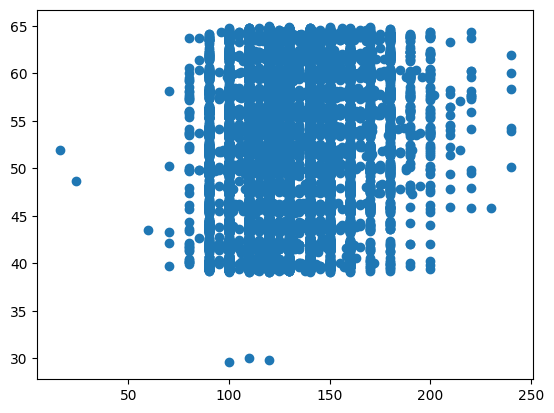

In [48]:
# 이렇게 보면 수축과 이완 혈압이 높지도 않고, 키에 비해서 몸무게가 높긴 하지만 콜레스트롤도 정상 이상이고, 대개 정상인 부분이 많은데 왜 양성이라고 했는가??
plt.scatter(train_input['ap_hi'], train_input['age'])

Optimization terminated successfully.
         Current function value: 0.573204
         Iterations 6


/var/folders/yd/4k8th6097mb8w26m8__j7j140000gn/T/ipykernel_39416/3765176583.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = -(coef[0] + coef[1]*x1) / coef[2]  # z = 0


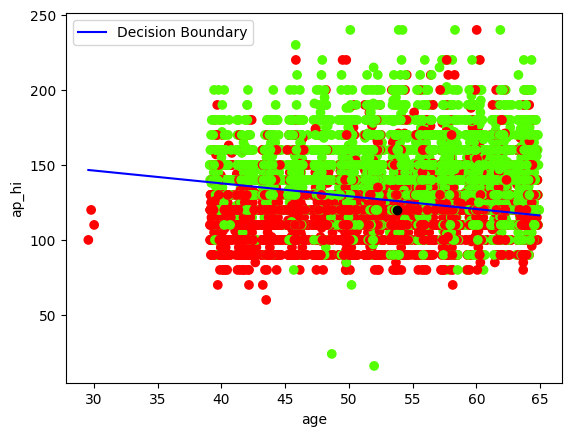

In [80]:
# 1. 특정 두 변수 선택 (예: 변수 1, 변수 2)
selected_vars = [0, 4]  # age와 ap_hi
X_selected = train_input.to_numpy()[:, selected_vars]

# 2. 로지스틱 회귀 훈련
log_model = sm.Logit(train_target, sm.add_constant(X_selected))
log_result = log_model.fit()

# 3. 가중치 가져오기
coef = log_result.params  # [w0, w1, w2]

# 4. 결정 경계 방정식 계산
x1 = np.linspace(min(X_selected[:, 0]), max(X_selected[:, 0]), 100)
x2 = -(coef[0] + coef[1]*x1) / coef[2]  # z = 0

# 5. 시각화
plt.scatter(X_selected[:, 0], X_selected[:, 1], c=train_target, cmap='prism')
plt.scatter(test_input.iloc[6]['age'], test_input.iloc[6]['ap_hi'], c='black')
plt.plot(x1, x2, color='blue', label='Decision Boundary')
plt.xlabel('age')
plt.ylabel('ap_hi')
plt.legend()
plt.show()

Optimization terminated successfully.
         Current function value: 0.575346
         Iterations 6


/var/folders/yd/4k8th6097mb8w26m8__j7j140000gn/T/ipykernel_39416/3424547340.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = -(coef[0] + coef[1]*x1) / coef[2]  # z = 0


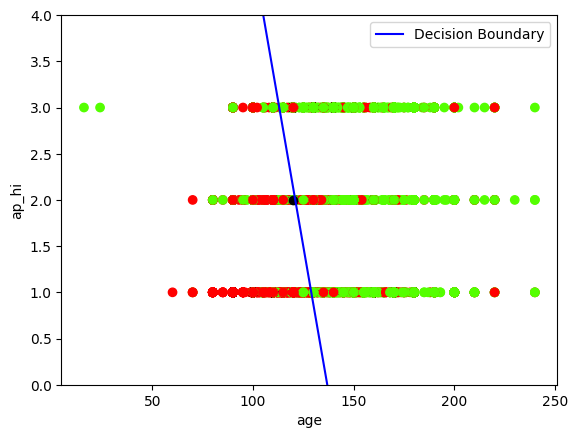

In [86]:
# 1. 특정 두 변수 선택 (예: 변수 1, 변수 2)
selected_vars = [4, 6]  # age와 ap_hi
X_selected = train_input.to_numpy()[:, selected_vars]

# 2. 로지스틱 회귀 훈련
log_model = sm.Logit(train_target, sm.add_constant(X_selected))
log_result = log_model.fit()

# 3. 가중치 가져오기
coef = log_result.params  # [w0, w1, w2]

# 4. 결정 경계 방정식 계산
x1 = np.linspace(min(X_selected[:, 0]), max(X_selected[:, 0]), 100)
x2 = -(coef[0] + coef[1]*x1) / coef[2]  # z = 0

# 5. 시각화
plt.scatter(X_selected[:, 0], X_selected[:, 1], c=train_target, cmap='prism')
plt.scatter(test_input.iloc[6]['ap_hi'], test_input.iloc[6]['cholesterol'], c='black')
plt.plot(x1, x2, color='blue', label='Decision Boundary')
plt.ylim([0, 4])
plt.xlabel('age')
plt.ylabel('ap_hi')
plt.legend()
plt.show()

Optimization terminated successfully.
         Current function value: 0.586168
         Iterations 6


/var/folders/yd/4k8th6097mb8w26m8__j7j140000gn/T/ipykernel_39416/2963747493.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = -(coef[0] + coef[1]*x1) / coef[2]  # z = 0


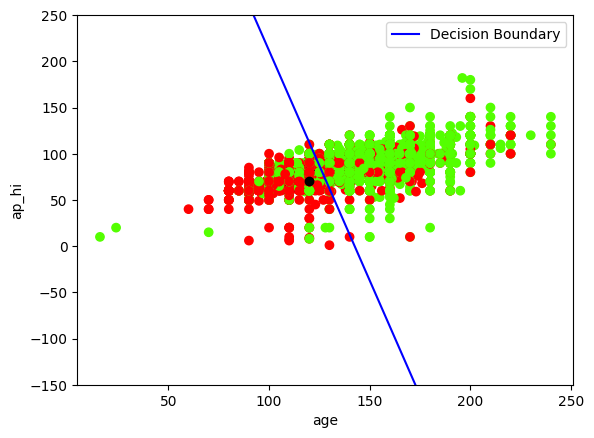

In [88]:
# 1. 특정 두 변수 선택 (예: 변수 1, 변수 2)
selected_vars = [4, 5]  # age와 ap_hi
X_selected = train_input.to_numpy()[:, selected_vars]

# 2. 로지스틱 회귀 훈련
log_model = sm.Logit(train_target, sm.add_constant(X_selected))
log_result = log_model.fit()

# 3. 가중치 가져오기
coef = log_result.params  # [w0, w1, w2]

# 4. 결정 경계 방정식 계산
x1 = np.linspace(min(X_selected[:, 0]), max(X_selected[:, 0]), 100)
x2 = -(coef[0] + coef[1]*x1) / coef[2]  # z = 0

# 5. 시각화
plt.scatter(X_selected[:, 0], X_selected[:, 1], c=train_target, cmap='prism')
plt.scatter(test_input.iloc[6]['ap_hi'], test_input.iloc[6]['ap_lo'], c='black')
plt.plot(x1, x2, color='blue', label='Decision Boundary')
plt.ylim([-150, 250])
plt.xlabel('age')
plt.ylabel('ap_hi')
plt.legend()
plt.show()

Optimization terminated successfully.
         Current function value: 0.584602
         Iterations 6


/var/folders/yd/4k8th6097mb8w26m8__j7j140000gn/T/ipykernel_39416/3040928666.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = -(coef[0] + coef[1]*x1) / coef[2]  # z = 0


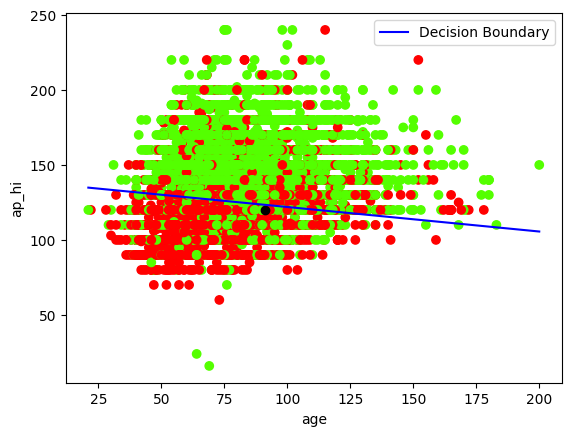

In [89]:
# 1. 특정 두 변수 선택 (예: 변수 1, 변수 2)
selected_vars = [3, 4]  # age와 ap_hi
X_selected = train_input.to_numpy()[:, selected_vars]

# 2. 로지스틱 회귀 훈련
log_model = sm.Logit(train_target, sm.add_constant(X_selected))
log_result = log_model.fit()

# 3. 가중치 가져오기
coef = log_result.params  # [w0, w1, w2]

# 4. 결정 경계 방정식 계산
x1 = np.linspace(min(X_selected[:, 0]), max(X_selected[:, 0]), 100)
x2 = -(coef[0] + coef[1]*x1) / coef[2]  # z = 0

# 5. 시각화
plt.scatter(X_selected[:, 0], X_selected[:, 1], c=train_target, cmap='prism')
plt.scatter(test_input.iloc[6]['weight'], test_input.iloc[6]['ap_hi'], c='black')
plt.plot(x1, x2, color='blue', label='Decision Boundary')
plt.xlabel('age')
plt.ylabel('ap_hi')
plt.legend()
plt.show()

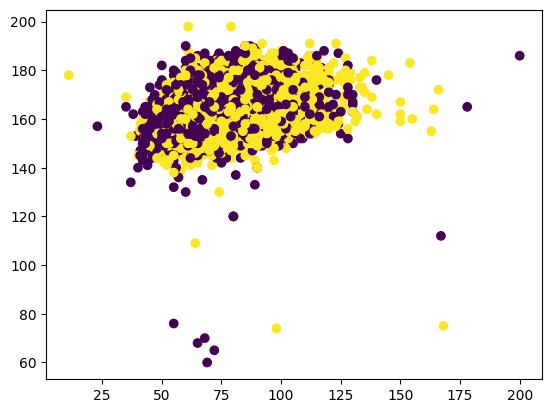

In [93]:
# 주요 변수들에 대해서 빨간 부분(양성)에 더 많이 분포되어있다는 것을 알 수 있다!
# 앞절에서 weight와 height를 통해서 모델을 구축했기 때문에 어떤 분포를 가지는지 살펴보자
plt.scatter(test_input['weight'], test_input['height'], c=test_target)

In [95]:
# 위의 그래프에서는 의사 결정 경계가 확인되지 않는다.
# 본질적으로 height가 증가하면 weight도 증가될 것으로 예상되지만, 잘못된 가설이라는 통찰력을 제공한다.
# 그렇다면 BMI지수는 각 특성들에 상관성이 있을까?
cvd_df2 = cvd_df.drop(columns='cardio').copy()
cvd_df2['BMI'] = cvd_df2['weight']/(cvd_df2['height']**2)
train_input, test_input, _, _ = train_test_split(cvd_df2,
                                                 y,
                                                 test_size=0.15,
                                                 random_state=42)

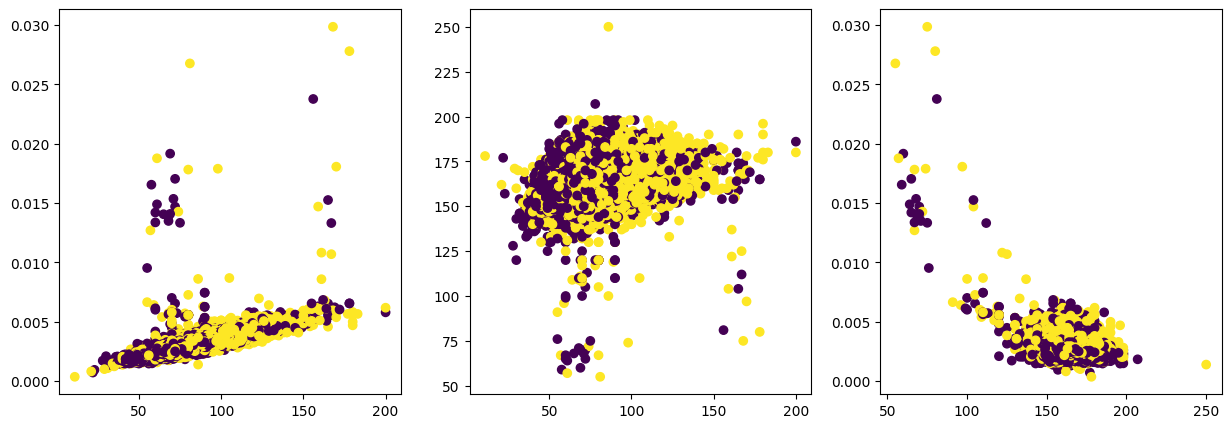

In [103]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].scatter(cvd_df2['weight'], cvd_df2['BMI'], c=y)
axes[1].scatter(cvd_df2['weight'], cvd_df2['height'], c=y)
axes[2].scatter(cvd_df2['height'], cvd_df2['BMI'], c=y)

Optimization terminated successfully.
         Current function value: 0.584165
         Iterations 7


/var/folders/yd/4k8th6097mb8w26m8__j7j140000gn/T/ipykernel_39416/2220459169.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = -(coef[0] + coef[1]*x1) / coef[2]  # z = 0


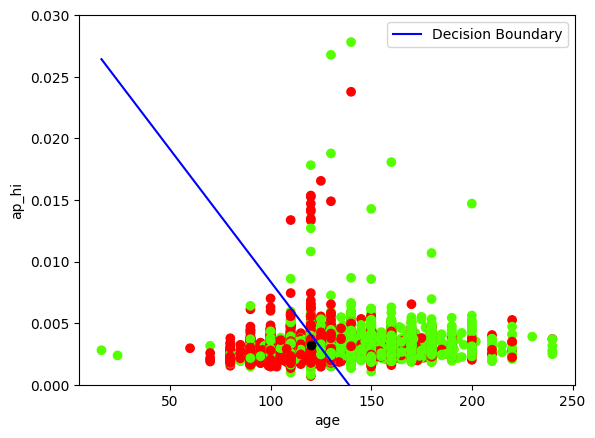

In [109]:
# 다른 값들보다 BMI와 weight 사이에 강한 선형관계가 존재한다!
selected_vars = [4, 11]  # ap_hi와 BMI
X_selected = train_input.to_numpy()[:, selected_vars]

# 2. 로지스틱 회귀 훈련
log_model = sm.Logit(train_target, sm.add_constant(X_selected))
log_result = log_model.fit()

# 3. 가중치 가져오기
coef = log_result.params  # [w0, w1, w2]

# 4. 결정 경계 방정식 계산
x1 = np.linspace(min(X_selected[:, 0]), max(X_selected[:, 0]), 100)
x2 = -(coef[0] + coef[1]*x1) / coef[2]  # z = 0

# 5. 시각화
plt.scatter(X_selected[:, 0], X_selected[:, 1], c=train_target, cmap='prism')
plt.scatter(test_input.iloc[6]['ap_hi'], test_input.iloc[6]['BMI'], c='black')
plt.plot(x1, x2, color='blue', label='Decision Boundary')
plt.ylim([0, 0.03])
plt.xlabel('age')
plt.ylabel('ap_hi')
plt.legend()
plt.show()

In [110]:
# 위의 검정색 동그라미가 빨간영역(양성)에 있기 때문에 양성 예측을 설명하는데 도움이 될 수 있음을 보여준다.